# **Battle of the Languages**
here is our code, blah blah blah, we can write more stuff here later
please feel free to play with the groupings and cells, I just did some initial stuff I thought  might be helpful, but it might need to be broken up more

Importing the Data from the various databases:

https://github.com/festvox/datasets-CMU_Wilderness One of the ones Emily recommended, has like 700 languages, seems like it was mined from people reading the new testament. has polish, spanish, english, (probably has greek but it's labeled by the language in that language so I was not positive what I was looking for)

https://openslr.org/resources.php The other one Emily recommended instead of the UPenn one, had a brief look and seems like it might be more helpful for spanish/english.

In [3]:
# YOUR FILEPATH HERE
# FILEPATH = "/Users/eviprousanidou/Desktop/BC/Natural Language Programming/NLPTermProject/" 

FILEPATH = "D:\\Users\\Kamil\\Projects\\0_Homework\\NLPtermproject"

In [4]:
import glob
import re
import parselmouth
from parselmouth.praat import call
import numpy as np

from os.path import join


import parselmouth, matplotlib.pyplot as plt
from collections import Counter
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.utils.multiclass import type_of_target

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier



<h1> Get Features

In [42]:
def getFeatures(wav_file):
    # get duration, mean pitch, mean intensity
    sound = parselmouth.Sound(wav_file)
    # pitch
    pitch = call(sound, "To Pitch", 0, 75, 600) 
    
    # new ==============
    pitch_stdev = call(pitch, "Get standard deviation", 0, 0, "Hertz")
    
    mean_pitch = call(pitch, "Get mean", 0, 0, "Hertz")
    min_pitch = call(pitch, "Get minimum", 0, 0, "Hertz", "Parabolic")
    max_pitch = call(pitch, "Get maximum", 0, 0, "Hertz", "Parabolic")
    
    # intensity
    intensity = call(sound, "To Intensity", 75, 0, "yes")

    # new ==============
    intensity_stdev = call(intensity, "Get standard deviation", 0, 0)
    
    mean_intensity = call(intensity, "Get mean", 0, 0, "energy")
    min_intensity = call(intensity, "Get minimum", 0, 0, "Parabolic")
    max_intensity = call(intensity, "Get maximum", 0, 0, "Parabolic")
    

    duration = call(sound, "Get total duration")

    # get mean features for vowels and consonants
    formant = call(sound, "To Formant (burg)", 0, 5, 5500, 0.025, 50)
  
    #tg_file = re.sub("wav", "TextGrid", wav_file)
    #textgrid = call("Read from file", tg_file)
    #intv = call(textgrid, "Get number of intervals", 1)
    
    # new ==============
    # get mfccs
    mfccs = call(sound, "To MFCC", 12, 0.015, 0.005, 100, 100, 0).to_array()
    mfcc_avg = [np.mean(mfccs[i]) for i in range(13)]
    
    
#     vowels = 0
#     consonants = 0
#     f1_vowels = 0
#     dur_vowels = 0
    


#     for i in range(1, intv):
#         phone = call(textgrid, "Get label of interval", 1, i)
#         # vowels
#         if phone == 'sil': continue
#         if re.match('[AEIOU]', phone):
#             vowels += 1
#             vowel_onset = call(textgrid, "Get starting point", 1, i)
#             vowel_offset = call(textgrid, "Get end point", 1, i)
#             midpoint = vowel_onset + ((vowel_offset - vowel_onset) / 2)
#             f1_vowels += call(formant, "Get value at time", 1, midpoint, "Hertz", "Linear")
#             dur_vowels += vowel_offset - vowel_onset
    
#     f1_vowels = f1_vowels / vowels if vowels > 0 else 0
#     dur_vowels = dur_vowels / vowels if vowels > 0 else 0
    
    

    results = [
                pitch_stdev,
                mean_pitch, 
                min_pitch,
                max_pitch,
                intensity_stdev,
                mean_intensity, 
                min_intensity,
                max_intensity,
                duration,
                mfcc_avg,
#                 f1_vowels, 
#                 dur_vowels,
            ]
   
    return results

<h1> Read Greek Data
    

In [43]:
counter = 0 

greek=[]

for wav_file in glob.glob(join(FILEPATH, "data/Greek/*.wav")):
    
    # print progress
    counter += 1
    if counter % 100 == 0:
        print(counter, wav_file)

    results = getFeatures(wav_file)
    greek.append(results)
    
#counter is 1800

100 D:\Users\Kamil\Projects\0_Homework\NLPtermproject\data/Greek\Paramythi_horis_onoma_0099.wav
200 D:\Users\Kamil\Projects\0_Homework\NLPtermproject\data/Greek\Paramythi_horis_onoma_0199.wav
300 D:\Users\Kamil\Projects\0_Homework\NLPtermproject\data/Greek\Paramythi_horis_onoma_0299.wav
400 D:\Users\Kamil\Projects\0_Homework\NLPtermproject\data/Greek\Paramythi_horis_onoma_0399.wav
500 D:\Users\Kamil\Projects\0_Homework\NLPtermproject\data/Greek\Paramythi_horis_onoma_0499.wav
600 D:\Users\Kamil\Projects\0_Homework\NLPtermproject\data/Greek\Paramythi_horis_onoma_0599.wav
700 D:\Users\Kamil\Projects\0_Homework\NLPtermproject\data/Greek\Paramythi_horis_onoma_0699.wav
800 D:\Users\Kamil\Projects\0_Homework\NLPtermproject\data/Greek\Paramythi_horis_onoma_0799.wav
900 D:\Users\Kamil\Projects\0_Homework\NLPtermproject\data/Greek\Paramythi_horis_onoma_0899.wav
1000 D:\Users\Kamil\Projects\0_Homework\NLPtermproject\data/Greek\Paramythi_horis_onoma_0999.wav
1100 D:\Users\Kamil\Projects\0_Homework

<h1> Read Polish / Czech Data

In [7]:
counter = 0 

czech=[]

for wav_file in glob.glob(join(FILEPATH, "data/Czech/*.wav")):
    
    # print progress
    counter += 1
    if counter % 100 == 0:
        print(counter, wav_file)

    results = getFeatures(wav_file)
    czech.append(results)

<h1> Read Spanish Data

In [8]:
counter = 0 

spanish=[]

print("female")
for wav_file in glob.glob(join(FILEPATH, "data/Spanish/female/*.wav")):
    
    # print progress
    counter += 1
    if counter % 100 == 0:
        print(counter, wav_file)

    results = getFeatures(wav_file)
    spanish.append(results)
#count is 700
print("male")
for wav_file in glob.glob(join(FILEPATH, "data/Spanish/male/*.wav")):
    
    # print progress
    counter += 1
    if counter % 100 == 0:
        print(counter, wav_file)

    results = getFeatures(wav_file)
    spanish.append(results)
    
#count is 2000

female
100 D:\Users\Kamil\Projects\0_Homework\NLPtermproject\data/Spanish/female\cof_07508_01762097048.wav
200 D:\Users\Kamil\Projects\0_Homework\NLPtermproject\data/Spanish/female\cof_08421_00971546947.wav
300 D:\Users\Kamil\Projects\0_Homework\NLPtermproject\data/Spanish/female\cof_08784_00373473053.wav
400 D:\Users\Kamil\Projects\0_Homework\NLPtermproject\data/Spanish/female\cof_08784_01746206903.wav
500 D:\Users\Kamil\Projects\0_Homework\NLPtermproject\data/Spanish/female\cof_09334_01022723555.wav
600 D:\Users\Kamil\Projects\0_Homework\NLPtermproject\data/Spanish/female\cof_09697_00209542155.wav
700 D:\Users\Kamil\Projects\0_Homework\NLPtermproject\data/Spanish/female\cof_09697_01693011674.wav
male
800 D:\Users\Kamil\Projects\0_Homework\NLPtermproject\data/Spanish/male\com_04310_01906265895.wav
900 D:\Users\Kamil\Projects\0_Homework\NLPtermproject\data/Spanish/male\com_05223_01172869424.wav
1000 D:\Users\Kamil\Projects\0_Homework\NLPtermproject\data/Spanish/male\com_06136_005005013

<h1> Read English Data

In [9]:
counter = 0 

english=[]

for wav_file in glob.glob(join(FILEPATH, "data/English/*.wav")):
    
    # print progress
    counter += 1
    if counter % 100 == 0:
        print(counter, wav_file)

    results = getFeatures(wav_file)
    english.append(results)
    
#count is 2000

100 D:\Users\Kamil\Projects\0_Homework\NLPtermproject\data/English\f0005_us_f0005_00153.wav
200 D:\Users\Kamil\Projects\0_Homework\NLPtermproject\data/English\f0005_us_f0005_00254.wav
300 D:\Users\Kamil\Projects\0_Homework\NLPtermproject\data/English\f0005_us_f0005_00354.wav
400 D:\Users\Kamil\Projects\0_Homework\NLPtermproject\data/English\m0001_us_m0001_00014.wav
500 D:\Users\Kamil\Projects\0_Homework\NLPtermproject\data/English\m0001_us_m0001_00114.wav
600 D:\Users\Kamil\Projects\0_Homework\NLPtermproject\data/English\m0001_us_m0001_00214.wav
700 D:\Users\Kamil\Projects\0_Homework\NLPtermproject\data/English\m0001_us_m0001_00314.wav
800 D:\Users\Kamil\Projects\0_Homework\NLPtermproject\data/English\m0002_us_m0002_00086.wav
900 D:\Users\Kamil\Projects\0_Homework\NLPtermproject\data/English\m0002_us_m0002_00186.wav
1000 D:\Users\Kamil\Projects\0_Homework\NLPtermproject\data/English\m0002_us_m0002_00286.wav
1100 D:\Users\Kamil\Projects\0_Homework\NLPtermproject\data/English\m0003_us_m0

In [10]:
# create class labels: greek = 0, spanish = 1, english = 2, czech = 3
greek_labels = np.zeros(len(greek), dtype=int)
spanish_labels = np.ones(len(spanish), dtype=int)
english_labels = np.full(len(english), int(2.0))
czech_labels = np.full(len(czech), int(3.0))

# put all features into a single numpy array
npdata = np.array(greek + spanish + english + czech)

# put all labels into a single numpy array
nptarget = np.concatenate([greek_labels, spanish_labels, english_labels, czech_labels])


In [11]:
print(len(npdata))
print(npdata)
print(nptarget)

5889
[[ 35.18038192 187.78492121 136.04353833 ...  17.88185354  77.27988631
    8.85986395]
 [ 29.43937302 187.16897262  75.28383705 ...  17.79161378  79.20710494
    9.05941043]
 [ 30.611966   182.225313    74.04474564 ...  17.95564229  76.60140491
    9.34875283]
 ...
 [ 21.92172982 122.39391129  77.75976781 ...  18.21153     73.20047108
    3.2       ]
 [ 21.09241601 140.79530728 110.44878388 ...  20.74858954  74.06688454
    3.32      ]
 [ 21.10489289 131.21954973  78.4693585  ...  17.44618348  72.89125882
    2.32      ]]
[0 0 0 ... 2 2 2]


<h1> Feature Selection
    

<p> Comment out any features we don't want to include

In [12]:
selection = [
    0, # pitch_stdev
    1, # mean_pitch
    2, # min_pitch
    3, # max_pitch
    4, # intensity_stdev
    5, # mean_intensity
    6, # min_intensity
    7, # max_intensity
    8, # duration
   # 9, # mfcc_avg
]

npdata = npdata[:, selection]

print(npdata.shape)

(5889, 9)


<h1> Scoring Metrics
    

In [33]:
# scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']
scoring_metrics = {'accuracy': metrics.make_scorer( metrics.accuracy_score),
                   'precision': metrics.make_scorer( metrics.precision_score, average = 'macro'),
                   'recall': metrics.make_scorer( metrics.recall_score, average = 'macro'),
                   'f1_macro': metrics.make_scorer( metrics.f1_score, average = 'macro'),
                   'f1_weighted': metrics.make_scorer( metrics.f1_score, average = 'weighted')}

<h1> Models

In [34]:
models = [
            GaussianNB(), 
            MLPClassifier(max_iter=300),
            LinearSVC(), 
            # Feedforward Neural Network
            QuadraticDiscriminantAnalysis(),
            LogisticRegression(),
            RandomForestClassifier(max_depth=4),  # try more max_depth
            DecisionTreeClassifier(), 
            KNeighborsClassifier(n_neighbors=3), # try more number of neighbors
            AdaBoostClassifier(n_estimators=100)
        ]

In [35]:
print(models)

print(type(nptarget))

[GaussianNB(), MLPClassifier(max_iter=300), LinearSVC(), QuadraticDiscriminantAnalysis(), LogisticRegression(), RandomForestClassifier(max_depth=4), DecisionTreeClassifier(), KNeighborsClassifier(n_neighbors=3), AdaBoostClassifier(n_estimators=100)]
<class 'numpy.ndarray'>


<h1> Test each Model
    

our target is not binary it has 4 unique values (0,1,2,3)
    

In [36]:
for model in models:

    # print model name
    model_name = str(type(model))
    model_name = model_name[model_name.rfind('.')+1:-2]
    print('\n' + model_name + '\n')

    # train and cross validate with 5 folds
    scores = cross_validate(model, npdata, nptarget, scoring=scoring_metrics, cv=5)
    for score_name, score_value in scores.items():
        if "test" in score_name:
            print(score_name, "\t", np.round(np.mean(score_value), 4))




GaussianNB

test_accuracy 	 0.9
test_precision 	 0.9257
test_recall 	 0.9026
test_f1_macro 	 0.8846
test_f1_weighted 	 0.8836

MLPClassifier

test_accuracy 	 0.8015
test_precision 	 0.8468
test_recall 	 0.8056
test_f1_macro 	 0.7841
test_f1_weighted 	 0.7793

LinearSVC



C:\Users\Kamil\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Kamil\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Kamil\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Kamil\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Kamil\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

test_accuracy 	 0.7023
test_precision 	 0.8161
test_recall 	 0.7019
test_f1_macro 	 0.6785
test_f1_weighted 	 0.6764

QuadraticDiscriminantAnalysis

test_accuracy 	 0.9036
test_precision 	 0.9334
test_recall 	 0.9063
test_f1_macro 	 0.8869
test_f1_weighted 	 0.8843

LogisticRegression



C:\Users\Kamil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Kamil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

test_accuracy 	 0.7619
test_precision 	 0.7769
test_recall 	 0.7666
test_f1_macro 	 0.7452
test_f1_weighted 	 0.7409

RandomForestClassifier

test_accuracy 	 0.9005
test_precision 	 0.9362
test_recall 	 0.9032
test_f1_macro 	 0.8849
test_f1_weighted 	 0.8842

DecisionTreeClassifier

test_accuracy 	 0.8918
test_precision 	 0.9208
test_recall 	 0.8944
test_f1_macro 	 0.8738
test_f1_weighted 	 0.8727

KNeighborsClassifier

test_accuracy 	 0.8249
test_precision 	 0.8597
test_recall 	 0.8281
test_f1_macro 	 0.8073
test_f1_weighted 	 0.8054

AdaBoostClassifier

test_accuracy 	 0.9353
test_precision 	 0.9416
test_recall 	 0.9363
test_f1_macro 	 0.9352
test_f1_weighted 	 0.9355


In [37]:
scores = cross_validate(LinearRegression(solver='lbfgs'), npdata, nptarget, scoring=scoring_metrics, cv=5)
                        
for score_name, score_value in scores.items():
    if "test" in score_name:
        print(score_name, "\t", np.round(np.mean(score_value), 4))

NameError: name 'LinearRegression' is not defined

<h1> Graphs

In [38]:
pitch_stdev = npdata[:,0]
pitch = npdata[:,1]
min_pitch = npdata[:,2]
max_pitch = npdata[:,3]
intensity_stdev = npdata[:,4]
intensity = npdata[:,5]
min_intensity = npdata[:,6]
max_intensity = npdata[:,7]
duration = npdata[:,8]

<p>Mean Pitch <br>  Mean Intensity <br> Mean Duration </p>

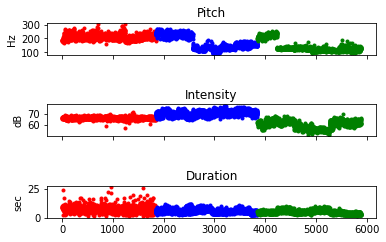

In [39]:
# fig, axs = plt.subplots(9, sharex=True)
fig, axs = plt.subplots(3, sharex=True)

for i in range(len(npdata)):
    if nptarget[i] == 0:
        axs[0].plot(i,pitch[i], color="red", marker=".")
        axs[1].plot(i,intensity[i], color="red", marker=".")
        axs[2].plot(i,duration[i], color="red", marker=".")
#        axs[3].plot(i,min_pitch[i], color="red", marker=".")
#        axs[4].plot(i,max_pitch[i], color="red", marker=".")
#        axs[5].plot(i,min_intensity[i], color="red", marker=".")
#        axs[6].plot(i,max_intensity[i], color="red", marker=".")
#        axs[7].plot(i,intensity_stdev[i], color="red", marker=".")
#        axs[8].plot(i,pitch_stdev[i], color="red", marker=".")
    elif nptarget[i] == 1:
        axs[0].plot(i,pitch[i], color="blue", marker=".")
        axs[1].plot(i,intensity[i], color="blue", marker=".")
        axs[2].plot(i,duration[i], color="blue", marker=".")
#        axs[3].plot(i,min_pitch[i], color="blue", marker=".")
#        axs[4].plot(i,max_pitch[i], color="blue", marker=".")
#        axs[5].plot(i,min_intensity[i], color="blue", marker=".")3        axs[6].plot(i,max_intensity[i], color="blue", marker=".")
#        axs[7].plot(i,intensity_stdev[i], color="blue", marker=".")
#        axs[8].plot(i,pitch_stdev[i], color="blue", marker=".")
    elif nptarget[i] == 2:
        axs[0].plot(i,pitch[i], color= "green", marker=".")
        axs[1].plot(i,intensity[i], color="green", marker=".")
        axs[2].plot(i,duration[i], color="green", marker=".")
#        axs[3].plot(i,min_pitch[i], color="green", marker=".")
#        axs[4].plot(i,max_pitch[i], color="green", marker=".")
#        axs[5].plot(i,min_intensity[i], color="green", marker=".")
#        axs[6].plot(i,max_intensity[i], color="green", marker=".")
#        axs[7].plot(i,intensity_stdev[i], color="green", marker=".")
#        axs[8].plot(i,pitch_stdev[i], color="green", marker=".")
    else:
        axs[0].plot(i,pitch[i], color= "yellow", marker=".")
        axs[1].plot(i,intensity[i], color="yellow", marker=".")
        axs[2].plot(i,duration[i], color="yellow", marker=".")
#        axs[3].plot(i,min_pitch[i], color="yellow", marker=".")
#        axs[4].plot(i,max_pitch[i], color="yellow", marker=".")
#        axs[5].plot(i,min_intensity[i], color="yellow", marker=".")
#        axs[6].plot(i,max_intensity[i], color="yellow", marker=".")
#        axs[7].plot(i,intensity_stdev[i], color="yellow", marker=".")
#        axs[8].plot(i,pitch_stdev[i], color="yellow", marker=".")
        

axs[0].set_title("Pitch")
axs[1].set_title("Intensity")
axs[2].set_title("Duration")
#axs[3].set_title("Minimum Pitch")
#axs[4].set_title("Maximum Pitch")
#axs[5].set_title("Minimum Intensity")
#axs[6].set_title("Maximum Intensity")
#axs[7].set_title("Intensity Standard Deviation")
#axs[8].set_title("Pitch Standard Deviation")

axs[0].set_ylabel("Hz")
axs[1].set_ylabel("dB")
axs[2].set_ylabel("sec")
#axs[3].set_ylabel("Hz")
#axs[4].set_ylabel("Hz")
#axs[5].set_ylabel("dB")
#axs[6].set_ylabel("dB")
#axs[7].set_ylabel("dB")
#axs[8].set_ylabel("Hz")

fig.tight_layout(pad=3.0)

plt.show()

#red = greek 
#blue = spanish
#green = english

<p> Minimum Pitch <br> Maximum Pitch <br> Pitch Standard Deviation </p>

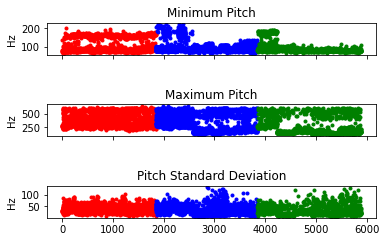

In [40]:
fig, axs = plt.subplots(3, sharex=True)

for i in range(len(npdata)):
    if nptarget[i] == 0:
        axs[0].plot(i,min_pitch[i], color="red", marker=".")
        axs[1].plot(i,max_pitch[i], color="red", marker=".")
        axs[2].plot(i,pitch_stdev[i], color="red", marker=".")
    elif nptarget[i] == 1:
        axs[0].plot(i,min_pitch[i], color="blue", marker=".")
        axs[1].plot(i,max_pitch[i], color="blue", marker=".")
        axs[2].plot(i,pitch_stdev[i], color="blue", marker=".")
    elif nptarget[i] == 2:
        axs[0].plot(i,min_pitch[i], color="green", marker=".")
        axs[1].plot(i,max_pitch[i], color="green", marker=".")
        axs[2].plot(i,pitch_stdev[i], color="green", marker=".")
    else:
        axs[0].plot(i,min_pitch[i], color="yellow", marker=".")
        axs[1].plot(i,max_pitch[i], color="yellow", marker=".")
        axs[2].plot(i,pitch_stdev[i], color="yellow", marker=".")
        
axs[0].set_title("Minimum Pitch")
axs[1].set_title("Maximum Pitch")
axs[2].set_title("Pitch Standard Deviation")

axs[0].set_ylabel("Hz")
axs[1].set_ylabel("Hz")
axs[2].set_ylabel("Hz")

fig.tight_layout(pad=3.0)

plt.show()

<p> Minimum Intensity <br> Maximum Intensity <br> Intensity Standard Deviation </p>

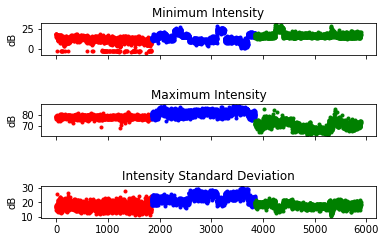

In [41]:
fig, axs = plt.subplots(3, sharex=True)

for i in range(len(npdata)):
    if nptarget[i] == 0:
        axs[0].plot(i,min_intensity[i], color="red", marker=".")
        axs[1].plot(i,max_intensity[i], color="red", marker=".")
        axs[2].plot(i,intensity_stdev[i], color="red", marker=".")
    elif nptarget[i] == 1:
        axs[0].plot(i,min_intensity[i], color="blue", marker=".")
        axs[1].plot(i,max_intensity[i], color="blue", marker=".")
        axs[2].plot(i,intensity_stdev[i], color="blue", marker=".")
    elif nptarget[i] == 2:
        axs[0].plot(i,min_intensity[i], color="green", marker=".")
        axs[1].plot(i,max_intensity[i], color="green", marker=".")
        axs[2].plot(i,intensity_stdev[i], color="green", marker=".")
    else:
        axs[0].plot(i,min_intensity[i], color="yellow", marker=".")
        axs[1].plot(i,max_intensity[i], color="yellow", marker=".")
        axs[2].plot(i,intensity_stdev[i], color="yellow", marker=".")
        

axs[0].set_title("Minimum Intensity")
axs[1].set_title("Maximum Intensity")
axs[2].set_title("Intensity Standard Deviation")

axs[0].set_ylabel("dB")
axs[1].set_ylabel("dB")
axs[2].set_ylabel("dB")

fig.tight_layout(pad=3.0)

plt.show()

Compiling said data to compatible formats and whatnot

In [ ]:
#insert code here

Feature Extraction and beyond...